In [1]:
import pandas as pd

df = pd.read_csv('grades_km_input.csv')

df.describe()

,Student,English,Math,Science
count,620.000000,620.000000,620.000000,620.000000
mean,310.475806,84.303226,77.877419,79.404839
std,179.082001,11.577860,12.310908,12.536047
min,1.000000,56.000000,55.000000,55.000000
25%,155.750000,78.000000,69.000000,70.000000
50%,310.500000,85.000000,78.000000,80.000000
75%,465.250000,95.000000,85.250000,90.000000
max,619.000000,100.000000,100.000000,100.000000


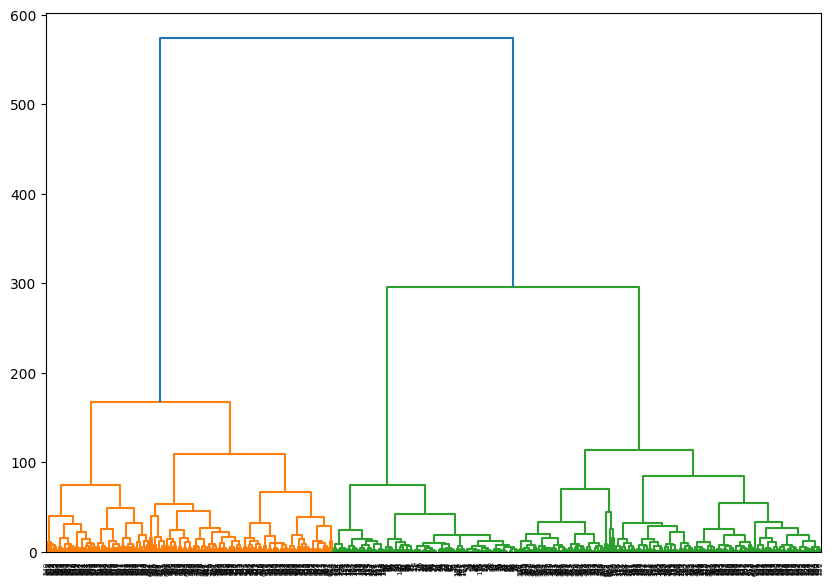

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data = df[['English','Math','Science']]

link=linkage(data, method='ward')

plt.figure(figsize=(10, 7))

dend = dendrogram(link)

In [3]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
 
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    model = AgglomerativeClustering(n_clusters=n_clusters)
    model.fit(data)
    silhouette_avg = silhouette_score(data, model.labels_)
    print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    round(silhouette_avg,2),
    )

For n_clusters = 2 The average silhouette_score is : 0.51
For n_clusters = 3 The average silhouette_score is : 0.48
For n_clusters = 4 The average silhouette_score is : 0.44
For n_clusters = 5 The average silhouette_score is : 0.38


In [4]:
model = AgglomerativeClustering(n_clusters=2)

model.fit(data)

print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [5]:
data['Cluster'] = model.labels_
print(data)

     English  Math  Science  Cluster
0         99    96       97        0
1         99    96       97        0
2         98    97       97        0
3         95   100       95        0
4         95    96       96        0
..       ...   ...      ...      ...
615       91    72       74        0
616       89    61       62        1
617       58    98       70        0
618       63    99       74        0
619       66    93       72        0

[620 rows x 4 columns]


In [6]:
data.groupby('Cluster')[['English', 'Math', 'Science']].mean()


,English,Math,Science
Cluster,,,
0,90.598465,85.552430,86.948849
1,73.554585,64.772926,66.524017


In [8]:
data.groupby('Cluster').describe()

English                                                       Math  \
          count       mean       std   min   25%   50%   75%    max  count   
Cluster                                                                      
0         391.0  90.598465  7.569500  58.0  86.0  92.0  97.0  100.0  391.0   
1         229.0  73.554585  9.050678  56.0  65.0  76.0  81.0   98.0  229.0   

                    ...              Science                                   \
              mean  ...   75%    max   count       mean       std   min   25%   
Cluster             ...                                                         
0        85.552430  ...  93.0  100.0   391.0  86.948849  7.973189  68.0  80.0   
1        64.772926  ...  70.0   75.0   229.0  66.524017  7.326088  55.0  60.0   

                            
          50%   75%    max  
Cluster                     
0        86.0  95.0  100.0  
1        66.0  71.0   95.0  

[2 rows x 24 columns]

In [15]:
data.groupby('Cluster')[['English', 'Math', 'Science']].describe().transpose()


Cluster                 0           1
English count  391.000000  229.000000
        mean    90.598465   73.554585
        std      7.569500    9.050678
        min     58.000000   56.000000
        25%     86.000000   65.000000
        50%     92.000000   76.000000
        75%     97.000000   81.000000
        max    100.000000   98.000000
Math    count  391.000000  229.000000
        mean    85.552430   64.772926
        std      7.755672    5.922819
        min     70.000000   55.000000
        25%     79.000000   60.000000
        50%     83.000000   65.000000
        75%     93.000000   70.000000
        max    100.000000   75.000000
Science count  391.000000  229.000000
        mean    86.948849   66.524017
        std      7.973189    7.326088
        min     68.000000   55.000000
        25%     80.000000   60.000000
        50%     86.000000   66.000000
        75%     95.000000   71.000000
        max    100.000000   95.000000

In [16]:
data.groupby('Cluster')[['English', 'Math', 'Science']].agg(['mean', 'std', 'min', 'max'])


English                          Math                     \
              mean       std min  max       mean       std min  max   
Cluster                                                               
0        90.598465  7.569500  58  100  85.552430  7.755672  70  100   
1        73.554585  9.050678  56   98  64.772926  5.922819  55   75   

           Science                     
              mean       std min  max  
Cluster                                
0        86.948849  7.973189  68  100  
1        66.524017  7.326088  55   95

In [17]:
for subject in df[['English','Math','Science']]:
    print(f"\n=== {subject} ===")
    display(data.groupby('Cluster')[subject].describe())



=== English ===


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,391.0,90.598465,7.569500,58.0,86.0,92.0,97.0,100.0
1,229.0,73.554585,9.050678,56.0,65.0,76.0,81.0,98.0



=== Math ===


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,391.0,85.552430,7.755672,70.0,79.0,83.0,93.0,100.0
1,229.0,64.772926,5.922819,55.0,60.0,65.0,70.0,75.0



=== Science ===


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,391.0,86.948849,7.973189,68.0,80.0,86.0,95.0,100.0
1,229.0,66.524017,7.326088,55.0,60.0,66.0,71.0,95.0


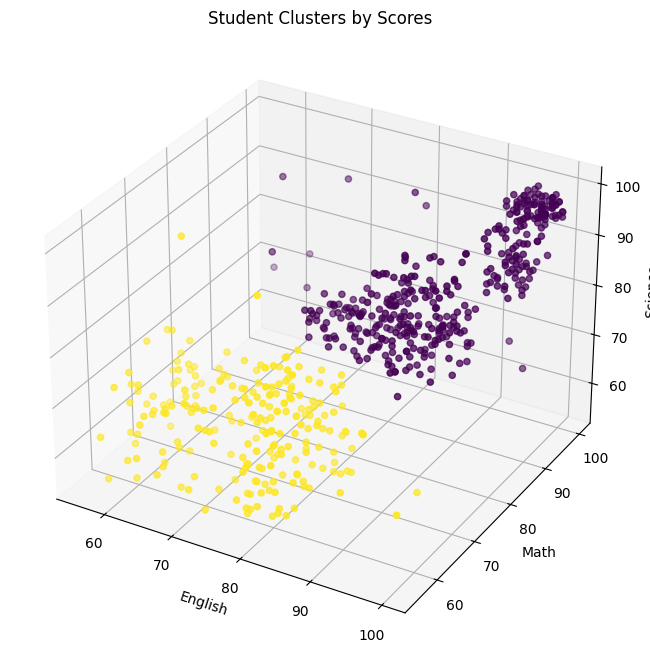

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['English'], data['Math'], data['Science'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('English')
ax.set_ylabel('Math')
ax.set_zlabel('Science')
plt.title("Student Clusters by Scores")
plt.show()


In [14]:
data[data['Cluster'] == 0].head()
#data[data['Cluster'] == 1].head()

,English,Math,Science,Cluster
0,99,96,97,0
1,99,96,97,0
2,98,97,97,0
3,95,100,95,0
4,95,96,96,0


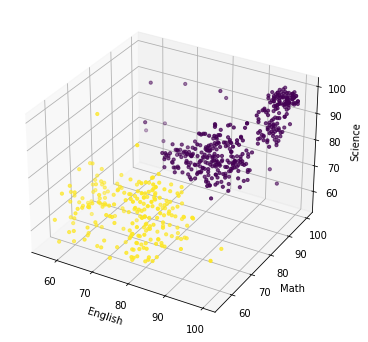

In [5]:
data['c'] = model.labels_

fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(1, 3, 1, projection='3d')

ax.scatter(data.English, data.Math, data.Science, c=data.c, s=10)

ax.set_xlabel('English')

ax.set_ylabel('Math')

ax.set_zlabel('Science')
plt.show()